# Light GBM (Microsoft 2017)
* XGBoost'un eğitim süresi performansını arttırmaya yönelik geliştirilen bir diğer GBM Türüdür.
* Daha performanslı
* Level-wise büyüme stratejisi yerine Leaf-wise büyüme stratejisi
* Breadth-first search (BFS) yerine, depth-first search.

libraray

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler ## standartlaStırma
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import neighbors
from sklearn.svm import SVR

In [2]:
df = pd.read_csv('Hitters.csv')
df = df.dropna()
y= df['Salary']
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']]) ## one hot encoding
X_= df.drop(['Salary', 'League', 'Division','NewLeague'], axis =1).astype('float64')
X= pd.concat([X_,dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

### Model ve tahmin

In [3]:
!pip install lightgbm

  Obtaining dependency information for lightgbm from https://files.pythonhosted.org/packages/74/02/5ad29a2a3d193a87d5a05fb7fd3b4e30b8eb6db7a9ddbe193beb7053978f/lightgbm-4.2.0-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   -------------------------------

In [6]:
import lightgbm
from lightgbm import LGBMRegressor

In [9]:
lgbm= LGBMRegressor().fit(X_train,y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000249 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 831
[LightGBM] [Info] Number of data points in the train set: 197, number of used features: 19
[LightGBM] [Info] Start training from score 543.483442
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

In [11]:
lgbm

LGBMRegressor()

In [12]:
y_pred= lgbm.predict(X_test)

In [13]:
np.sqrt(mean_squared_error(y_test,y_pred))

363.8712087611089

Tuning

In [14]:
?lgbm

Type:           LGBMRegressor
String form:    LGBMRegressor()
File:           c:\users\ycanf\anaconda3\lib\site-packages\lightgbm\sklearn.py
Docstring:      LightGBM regressor.
Init docstring:
Construct a gradient boosting model.

Parameters
----------
boosting_type : str, optional (default='gbdt')
    'gbdt', traditional Gradient Boosting Decision Tree.
    'dart', Dropouts meet Multiple Additive Regression Trees.
    'rf', Random Forest.
num_leaves : int, optional (default=31)
    Maximum tree leaves for base learners.
max_depth : int, optional (default=-1)
    Maximum tree depth for base learners, <=0 means no limit.
learning_rate : float, optional (default=0.1)
    Boosting learning rate.
    You can use ``callbacks`` parameter of ``fit`` method to shrink/adapt learning rate
    in training using ``reset_parameter`` callback.
    Note, that this will ignore the ``learning_rate`` argument in training.
n_estimators : int, optional (default=100)
    Number of boosted trees to fit.
sub

In [16]:
lgbm = LGBMRegressor()

In [15]:
lgbm_params = {'learning_rate' : [0.01,0.1,0.5,1],
              'n_estimators ' : [20,40,100,200,500,1000],
              'max_depth' : [1,2,3,4,5,6,7,8,9,10]}


In [18]:
?GridSearchCV

Init signature:
GridSearchCV(
    estimator,
    param_grid,
    *,
    scoring=None,
    n_jobs=None,
    refit=True,
    cv=None,
    verbose=0,
    pre_dispatch='2*n_jobs',
    error_score=nan,
    return_train_score=False,
)
Docstring:     
Exhaustive search over specified parameter values for an estimator.

Important members are fit, predict.

GridSearchCV implements a "fit" and a "score" method.
It also implements "score_samples", "predict", "predict_proba",
"decision_function", "transform" and "inverse_transform" if they are
implemented in the estimator used.

The parameters of the estimator used to apply these methods are optimized
by cross-validated grid-search over a parameter grid.

Read more in the :ref:`User Guide <grid_search>`.

Parameters
----------
estimator : estimator object
    This is assumed to implement the scikit-learn estimator interface.
    Either estimator needs to provide a ``score`` function,
    or ``scoring`` must be passed.

param_grid : dict or list of

In [17]:
lgbm_cv= GridSearchCV(lgbm,lgbm_params,cv=10,n_jobs=-1,verbose=3).fit(X_train,y_train)

Fitting 10 folds for each of 240 candidates, totalling 2400 fits
[LightGBM] [Warning] Unknown parameter: 20
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] Unknown parameter: 20
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000207 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 831
[LightGBM] [Info] Number of data points in the train set: 197, number of used features: 19
[LightGBM] [Info] Start training from score 543.483442
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

In [27]:
lgbm_cv.best_params_

{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators ': 20}

In [28]:
lgbm_tuned = LGBMRegressor(learning_rate= 0.1, max_depth=4, n_estimators=20).fit(X_train,y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000135 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 831
[LightGBM] [Info] Number of data points in the train set: 197, number of used features: 19
[LightGBM] [Info] Start training from score 543.483442
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

In [29]:
y_pred=lgbm_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

371.34440690249164

# değişken önem düzeyi

In [30]:
Importance = pd.DataFrame({'Importance': lgbm_tuned.feature_importances_*100},
                         index= X_train.columns)

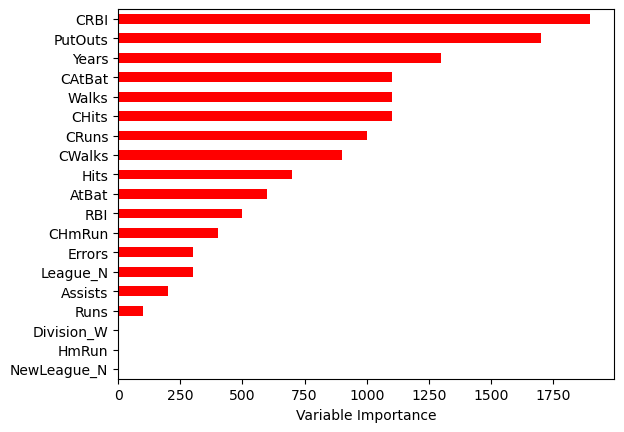

In [31]:
Importance.sort_values(by = 'Importance', axis = 0 , ascending=True).plot(kind='barh', color='r')
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

In [25]:
gbm_model_tuned.feature_importances_*100

array([ 5.86141353,  4.32251058,  3.59488159,  4.5849566 ,  4.55157582,
        5.57909803,  6.98254942,  6.61501666,  9.83943806,  5.00727323,
        8.93188501, 10.00533385,  5.10570429,  7.76594432,  4.62295354,
        3.93314061,  0.82732859,  0.98026126,  0.88873502])